# Datacamp: Data exploration using Pandas

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In short, we want to make beautiful map to report results of a referendum. In some way, we would like to depict results with something similar to the following example:

<img align="left" width=50% src="./image/example_map.png">

#### For a couple of hints (if you wish), see below:

* Open the `data/referendum.csv` file and you can scan the 5 first rows to understand the structure of the data.

In [3]:
# %load solutions/24_solutions.py
df_referendum = pd.read_csv("data/referendum.csv", sep=';')


In [4]:
# %load solutions/25_solutions.py
df_referendum.head()


,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52


* There is no information about regions in this file. Then, load the information related to the regions from the file `data/regions.csv`. Show the 5 first rows.

In [5]:
# %load solutions/27_solutions.py
df_regions = pd.read_csv(os.path.join('data', 'regions.csv'))
df_regions.head()


,id,code,name,slug
0,1,01,Guadeloupe,guadeloupe
1,2,02,Martinique,martinique
2,3,03,Guyane,guyane
3,4,04,La Réunion,la reunion
4,5,06,Mayotte,mayotte


* Load the information related to the departments from the file `data/departments.csv`. Show the 5 first rows.

In [6]:
# %load solutions/28_solutions.py
df_departments = pd.read_csv(os.path.join('data', 'departments.csv'))
df_departments.head()


,id,region_code,code,name,slug
0,1,84,01,Ain,ain
1,2,32,02,Aisne,aisne
2,3,84,03,Allier,allier
3,4,93,04,Alpes-de-Haute-Provence,alpes de haute provence
4,5,93,05,Hautes-Alpes,hautes alpes


In [7]:
df_referendum["Department code"] = df_referendum["Department code"].apply(
    lambda x: "0" + x if len(x) == 1 else x
)

* Find the column in the departments dataframe which is related to the `code` column of the regions dataframe. Merge both dataframe using these informations. Show the 5 first rows of the resulting dataframe.

In [8]:
# %load solutions/29_solutions.py
df_reg_dep = df_departments.merge(df_regions, how='inner', left_on='region_code', right_on='code')
df_reg_dep.head()


,id_x,region_code,code_x,name_x,slug_x,id_y,code_y,name_y,slug_y
0,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
1,3,84,03,Allier,allier,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
2,7,84,07,Ardèche,ardeche,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
3,15,84,15,Cantal,cantal,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
4,25,84,26,Drôme,drome,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes


* In the previous dataframe as column linked to the department code which could be merged with our referendum data as we did previously. Since we already got information about the regions, we can get the regions dataframe with a new merge. Show the 5 first rows of the merged dataframe.

In [9]:
# %load solutions/30_solutions.py
df = df_referendum.merge(df_reg_dep, how='inner', left_on='Department code', right_on='code_x')
df.head()


,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B,id_x,region_code,code_x,name_x,slug_x,id_y,code_y,name_y,slug_y
0,01,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
1,01,AIN,2,L'Abergement-de-Varey,215,36,5,66,108,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
2,01,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
3,01,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes
4,01,AIN,6,Ambléon,105,17,1,35,52,1,84,01,Ain,ain,16,84,Auvergne-Rhône-Alpes,auvergne rhone alpes


* Group and add up the vote by region and show the resulting dataframe.

In [10]:
# %load solutions/31_solutions.py
regions_vote = df.groupby(['code_y', 'name_y']).sum()
regions_vote


,,Town code,Registered,Abstentions,Null,Choice A,Choice B,id_x,id_y
code_y,name_y,,,,,,,,
11,Île-de-France,362162,6942361,1515884,85997,2536620,2803860,108231,7686
24,Centre-Val de Loire,299535,1801366,326560,28827,590890,855089,63325,12887
27,Bourgogne-Franche-Comté,1095634,1997925,358321,33671,668246,937687,198727,30648
28,Normandie,1115294,2372779,426075,35513,816972,1094219,146683,29079
32,Hauts-de-France,1533397,4210444,866555,60601,1411257,1872031,202632,38360
44,Grand Est,1502456,3857089,783348,56951,1088684,1928106,273846,57101
52,Pays de la Loire,245308,2605438,412509,47677,922468,1222784,93816,18024
53,Bretagne,214573,2380594,364724,36077,944052,1035741,43342,16510
75,Nouvelle-Aquitaine,968048,4201774,711017,71629,1641249,1777879,187854,63070


* Taking example on the previous case, plot the vote for the "choice A" and "choice B". Use the file `regions.geojson` which contains geographical information regarding the region. You can use `geopandas` which will load these information into a dataframe that you can merge with any other dataframe.
* Once the data are merged, you can plot the absolute count and ratio of votes per region.

In [11]:
import geopandas as gpd

# %load solutions/32_solutions.py
gdf_regions = gpd.read_file(os.path.join('data', 'regions.geojson'))
gdf_regions = gdf_regions.merge(regions_vote, how='inner', left_on='code', right_on='code_y')

gdf_normalized = gdf_regions.copy()
gdf_normalized['Choice A'] /= gdf_regions[['Choice A', 'Choice B']].sum(axis=1)
gdf_normalized['Choice B'] /= gdf_regions[['Choice A', 'Choice B']].sum(axis=1)


ModuleNotFoundError: No module named 'geopandas'

In [12]:
# %load solutions/33_solutions.py
gdf_normalized.plot(column='Choice B')


NameError: name 'gdf_normalized' is not defined

<AxesSubplot:>

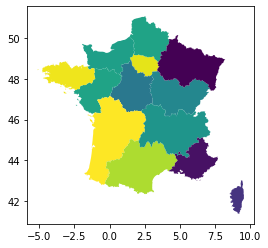

In [12]:
# %load solutions/34_solutions.py
gdf_normalized.plot(column='Choice A')
